# PROJECT : CREDIT CARD FROUD DETECTION

In our project, we employ Machine Learning to combat the rising threat of credit card fraud. Focused on developing a predictive model, we leverage historical transaction data and advanced algorithms, particularly decision tree-based models like Random Forests. Our goal is to create an adaptive system capable of identifying fraudulent transactions, addressing challenges in imbalanced datasets and achieving a balance between precision and recall. Join us in this endeavor to enhance security, reduce financial losses, and fortify the integrity of electronic transactions.

### IMPORTING LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

### LOADING THE DATA

In [2]:
df=pd.read_csv('creditcard.csv')

In [42]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### BASIC INFORMATION OF DATASET

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [6]:
df.shape

(284807, 31)

### CHECK NULL VALUES

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

### STATISTICAL INFORMATION OF DATASET

In [8]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [9]:
df.corr()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
Time,1.000000,1.173963e-01,-1.059333e-02,-4.196182e-01,-1.052602e-01,1.730721e-01,-6.301647e-02,8.471437e-02,-3.694943e-02,-8.660434e-03,...,4.473573e-02,1.440591e-01,5.114236e-02,-1.618187e-02,-2.330828e-01,-4.140710e-02,-5.134591e-03,-9.412688e-03,-0.010596,-0.012323
V1,0.117396,1.000000e+00,4.135835e-16,-1.227819e-15,-9.215150e-16,1.812612e-17,-6.506567e-16,-1.005191e-15,-2.433822e-16,-1.513678e-16,...,-2.457409e-16,-4.290944e-16,6.168652e-16,-4.425156e-17,-9.605737e-16,-1.581290e-17,1.198124e-16,2.083082e-15,-0.227709,-0.101347
V2,-0.010593,4.135835e-16,1.000000e+00,3.243764e-16,-1.121065e-15,5.157519e-16,2.787346e-16,2.055934e-16,-5.377041e-17,1.978488e-17,...,-8.480447e-17,1.526333e-16,1.634231e-16,1.247925e-17,-4.478846e-16,2.057310e-16,-4.966953e-16,-5.093836e-16,-0.531409,0.091289
V3,-0.419618,-1.227819e-15,3.243764e-16,1.000000e+00,4.711293e-16,-6.539009e-17,1.627627e-15,4.895305e-16,-1.268779e-15,5.568367e-16,...,5.706192e-17,-1.133902e-15,-4.983035e-16,2.686834e-19,-1.104734e-15,-1.238062e-16,1.045747e-15,9.775546e-16,-0.210880,-0.192961
V4,-0.105260,-9.215150e-16,-1.121065e-15,4.711293e-16,1.000000e+00,-1.719944e-15,-7.491959e-16,-4.104503e-16,5.697192e-16,6.923247e-16,...,-1.949553e-16,-6.276051e-17,9.164206e-17,1.584638e-16,6.070716e-16,-4.247268e-16,3.977061e-17,-2.761403e-18,0.098732,0.133447
V5,0.173072,1.812612e-17,5.157519e-16,-6.539009e-17,-1.719944e-15,1.000000e+00,2.408382e-16,2.715541e-16,7.437229e-16,7.391702e-16,...,-3.920976e-16,1.253751e-16,-8.428683e-18,-1.149255e-15,4.808532e-16,4.319541e-16,6.590482e-16,-5.613951e-18,-0.386356,-0.094974
V6,-0.063016,-6.506567e-16,2.787346e-16,1.627627e-15,-7.491959e-16,2.408382e-16,1.000000e+00,1.191668e-16,-1.104219e-16,4.131207e-16,...,5.833316e-17,-4.705235e-19,1.046712e-16,-1.071589e-15,4.562861e-16,-1.357067e-16,-4.452461e-16,2.594754e-16,0.215981,-0.043643
V7,0.084714,-1.005191e-15,2.055934e-16,4.895305e-16,-4.104503e-16,2.715541e-16,1.191668e-16,1.000000e+00,3.344412e-16,1.122501e-15,...,-2.027779e-16,-8.898922e-16,-4.387401e-16,7.434913e-18,-3.094082e-16,-9.657637e-16,-1.782106e-15,-2.776530e-16,0.397311,-0.187257
V8,-0.036949,-2.433822e-16,-5.377041e-17,-1.268779e-15,5.697192e-16,7.437229e-16,-1.104219e-16,3.344412e-16,1.000000e+00,4.356078e-16,...,3.892798e-16,2.026927e-16,6.377260e-17,-1.047097e-16,-4.653279e-16,-1.727276e-16,1.299943e-16,-6.200930e-16,-0.103079,0.019875
V9,-0.008660,-1.513678e-16,1.978488e-17,5.568367e-16,6.923247e-16,7.391702e-16,4.131207e-16,1.122501e-15,4.356078e-16,1.000000e+00,...,1.936953e-16,-7.071869e-16,-5.214137e-16,-1.430343e-16,6.757763e-16,-7.888853e-16,-6.709655e-17,1.110541e-15,-0.044246,-0.097733


### UNIVARIATE AND BIVARIATE ANALYSIS

The Pie chart shows the majority is non-fraudulent transactions and only a small segment represents fraud , it represents a class imbalance.


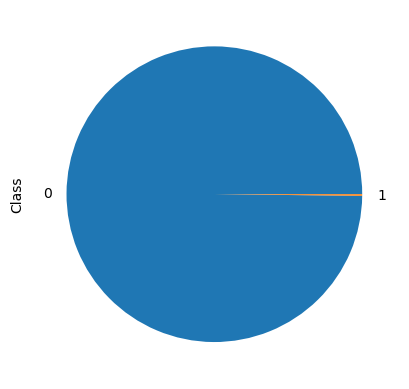

In [46]:
df['Class'].value_counts().plot(kind='pie')

#### The Pie chart shows the majority is non-fraudulent transactions and only a small segment represents fraud , it represents a class imbalance.

#### The scatter plot showcases the relationship between time and transaction amount for the first 50 entries in dataset. It reveals no distinct pattern, suggesting no evident correlation between the time of a transaction and the corresponding transaction amount within this subset.

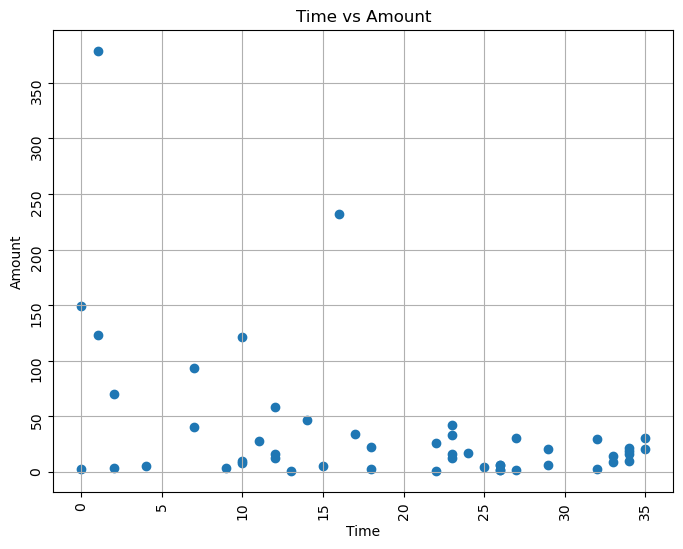

In [45]:
plt.figure(figsize=(8, 6))
plt.scatter(x=df['Time'][0:50], y=df['Amount'][0:50])
plt.title('Time vs Amount')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xticks(rotation=90)
plt.yticks(rotation=90)
plt.grid()
plt.show()

### SEPARATING INTO FEATURES AND TARGET COLUMNS

In [10]:
x=df.iloc[:,0:-1]

x.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [11]:
y=df['Class']

y.value_counts()

0    284315
1       492
Name: Class, dtype: int64

### OverSampling : Duplicating samples from the minority class

In [12]:
import imblearn

In [13]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [14]:
ros=RandomOverSampler(random_state=1)
x_ros,y_ros=ros.fit_resample(x,y)

In [15]:
print('Original dataset:',Counter(y))
print('reshaped dataset:',Counter(y_ros))

Original dataset: Counter({0: 284315, 1: 492})
reshaped dataset: Counter({0: 284315, 1: 284315})


### SMOTE: Synthetic Minority Oversampling Technique

In [16]:
from imblearn.over_sampling import SMOTE

### Spliting the data into training and testing

In [17]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=1)

### 1 - Predicting by using Logistics Regression

In [18]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(xtrain,ytrain)
ypred=lr.predict(xtest)

In [19]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(ytest,ypred))
ac = accuracy_score(ytest,ypred)
print("Accuracy score : ",ac)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.63      0.64      0.63       135

    accuracy                           1.00     85443
   macro avg       0.81      0.82      0.82     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy score :  0.9988296291094648


In [20]:
counter=Counter(ytrain)
print('Before',counter)
sm=SMOTE()
xtrain,ytrain=sm.fit_resample(xtrain,ytrain)
xtrains,ytrains=sm.fit_resample(xtrain,ytrain.ravel())

counter=Counter(ytrains)
print('After',counter)

Before Counter({0: 199007, 1: 357})
After Counter({0: 199007, 1: 199007})


In [21]:
lr1=LogisticRegression()
lr1.fit(xtrains,ytrains)
ypred=lr1.predict(xtest)

print(classification_report(ytest,ypred))

ac = accuracy_score(ytest,ypred)
print("Accuracy score : ",ac)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85308
           1       0.09      0.85      0.17       135

    accuracy                           0.99     85443
   macro avg       0.55      0.92      0.58     85443
weighted avg       1.00      0.99      0.99     85443

Accuracy score :  0.9865992533033718


In [22]:
df.Class.value_counts() 

0    284315
1       492
Name: Class, dtype: int64

### 2 - Predicting by using Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
rc = RandomForestClassifier()
rc.fit(xtrain,ytrain)
ypred = rc.predict(xtest)

In [25]:
print(classification_report(ytest,ypred))
ac = accuracy_score(ytest,ypred)
print("Accuracy score : ",ac)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.83      0.80      0.82       135

    accuracy                           1.00     85443
   macro avg       0.92      0.90      0.91     85443
weighted avg       1.00      1.00      1.00     85443

Accuracy score :  0.9994265182636377


### 3 - Predicting by using Decision Tree Classifier

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()

In [28]:
def mymodel(model):
 model.fit(xtrain,ytrain)
 ypred = model.predict(xtest)
 print(accuracy_score(ytest,ypred))
 print(classification_report(ytest,ypred))
 
 return model

In [29]:
mymodel(dt)

0.9979752583593741
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.42      0.76      0.54       135

    accuracy                           1.00     85443
   macro avg       0.71      0.88      0.77     85443
weighted avg       1.00      1.00      1.00     85443



DecisionTreeClassifier()

In [30]:
from sklearn import tree

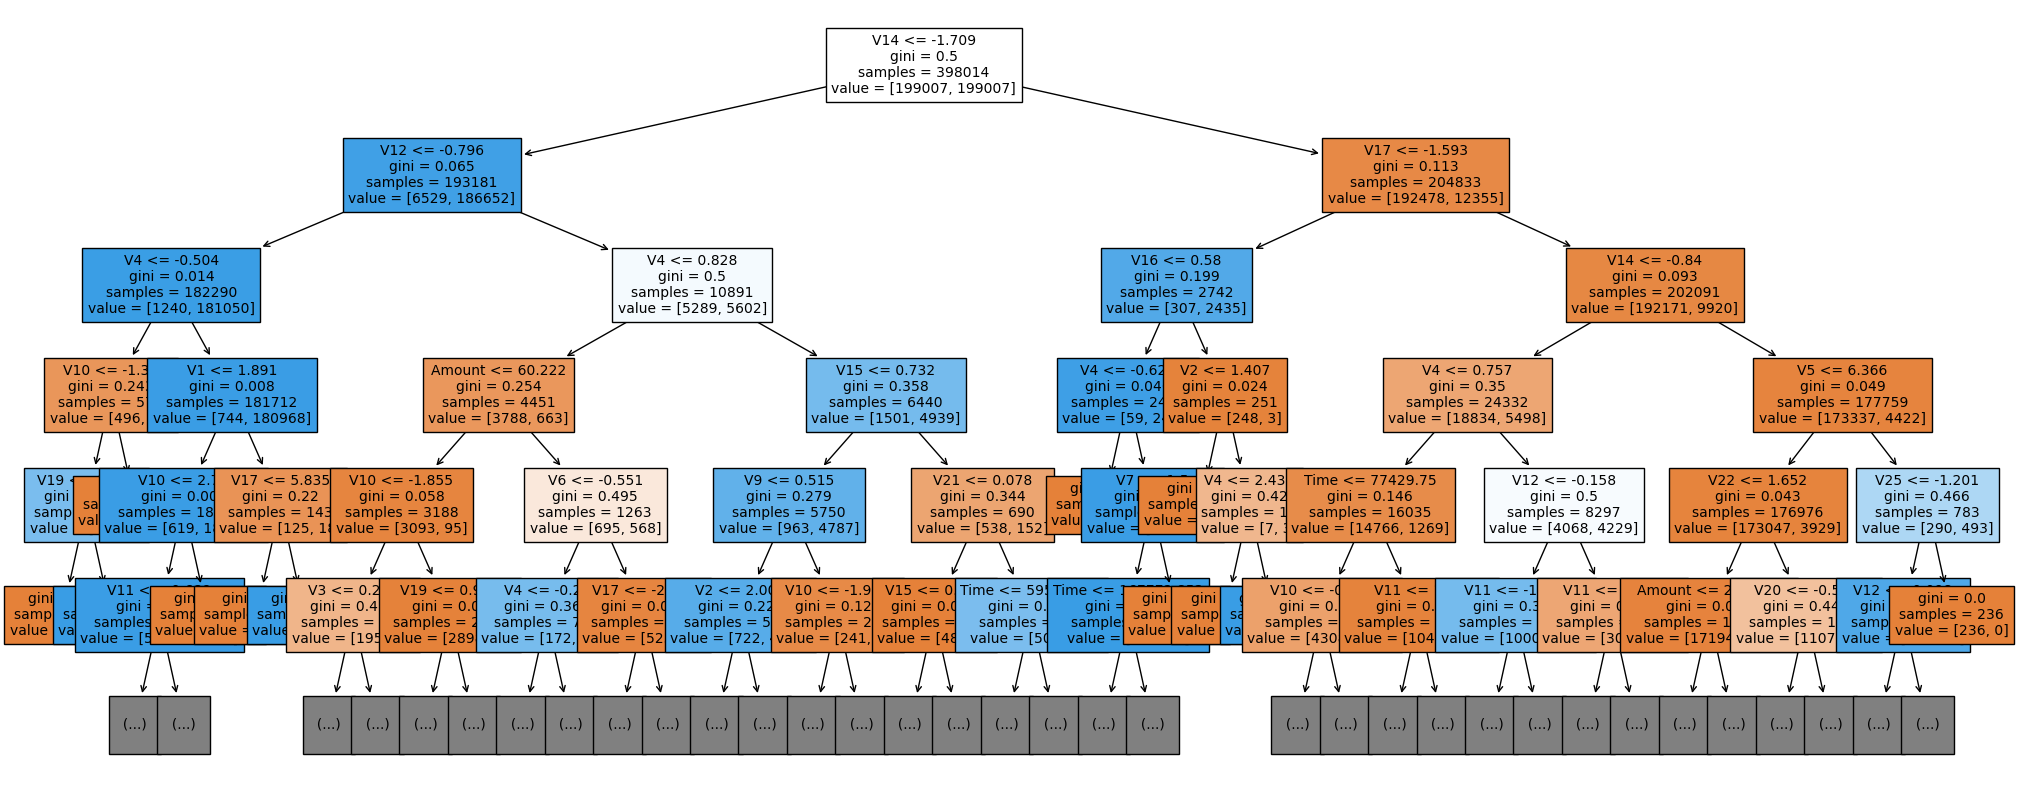

In [31]:
fig,ax = plt.subplots(figsize = (25,10))
chart = tree.plot_tree(dt, max_depth =5, feature_names = x.columns, filled = True, fontsize=10)
plt.savefig("DecisionTree.jpg")

In [32]:
train = dt.score(xtrain,ytrain)
test = dt.score(xtest,ytest)
print(f"Train score :{train} \nTest score : {test}")

Train score :1.0 
Test score : 0.9979752583593741


### HPT

#### i - max_depth

In [33]:
for i in range(20,35):
 dt1 = DecisionTreeClassifier(max_depth = i)
 dt1.fit(xtrain,ytrain)
 ypred = dt1.predict(xtest)
 ac = accuracy_score(ytest,ypred)
 print(f"max_depth = {i} accuracy : {ac}")

max_depth = 20 accuracy : 0.997273035825053
max_depth = 21 accuracy : 0.9974251840408226
max_depth = 22 accuracy : 0.99750711000316
max_depth = 23 accuracy : 0.9977177767634563
max_depth = 24 accuracy : 0.9976826656367402
max_depth = 25 accuracy : 0.9977645915990777
max_depth = 26 accuracy : 0.9978933323970366
max_depth = 27 accuracy : 0.9977645915990777
max_depth = 28 accuracy : 0.9981039991573329
max_depth = 29 accuracy : 0.997940147232658
max_depth = 30 accuracy : 0.9978114064346991
max_depth = 31 accuracy : 0.9979635546504687
max_depth = 32 accuracy : 0.997905036105942
max_depth = 33 accuracy : 0.9979284435237527
max_depth = 34 accuracy : 0.9980571843217115


In [34]:
dt2 = DecisionTreeClassifier(max_depth = 24)
mymodel(dt2)

0.9976826656367402
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.38      0.78      0.51       135

    accuracy                           1.00     85443
   macro avg       0.69      0.89      0.76     85443
weighted avg       1.00      1.00      1.00     85443



DecisionTreeClassifier(max_depth=24)

In [35]:
train = dt2.score(xtrain,ytrain)
test = dt2.score(xtest,ytest)
print(f"Train score :{train} \nTest score : {test}")

Train score :0.9997763897752341 
Test score : 0.9976826656367402


#### ii - min_samples_split

In [36]:
for i in range(90,110):
 dt3 = DecisionTreeClassifier(min_samples_split = i)
 dt3.fit(xtrain,ytrain)
 ypred = dt3.predict(xtest)
 ac = accuracy_score(ytest,ypred)
 print(f"min_samples_split = {i} accuracy : {ac}")

min_samples_split = 90 accuracy : 0.9968048874688389
min_samples_split = 91 accuracy : 0.9968517023044603
min_samples_split = 92 accuracy : 0.9967229615065014
min_samples_split = 93 accuracy : 0.9967931837599335
min_samples_split = 94 accuracy : 0.9967229615065014
min_samples_split = 95 accuracy : 0.9967229615065014
min_samples_split = 96 accuracy : 0.9966176281263532
min_samples_split = 97 accuracy : 0.9967346652154068
min_samples_split = 98 accuracy : 0.9966527392530693
min_samples_split = 99 accuracy : 0.9967580726332175
min_samples_split = 100 accuracy : 0.9967580726332175
min_samples_split = 101 accuracy : 0.9968165911777442
min_samples_split = 102 accuracy : 0.9967229615065014
min_samples_split = 103 accuracy : 0.9967112577975961
min_samples_split = 104 accuracy : 0.9966527392530693
min_samples_split = 105 accuracy : 0.9968048874688389
min_samples_split = 106 accuracy : 0.9967112577975961
min_samples_split = 107 accuracy : 0.9967697763421228
min_samples_split = 108 accuracy : 0.9

In [37]:
dt4 = DecisionTreeClassifier(min_samples_split = 92)
mymodel(dt4)

0.9967346652154068
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.30      0.77      0.43       135

    accuracy                           1.00     85443
   macro avg       0.65      0.88      0.71     85443
weighted avg       1.00      1.00      1.00     85443



DecisionTreeClassifier(min_samples_split=92)

In [38]:
train = dt2.score(xtrain,ytrain)
test = dt2.score(xtest,ytest)
print(f"Train score :{train} \nTest score : {test}")

Train score :0.9997763897752341 
Test score : 0.9976826656367402


#### iii - min_samples_leaf

In [39]:
for i in range(30,50):
 dt5 = DecisionTreeClassifier(min_samples_leaf = i)
 dt5.fit(xtrain,ytrain)
 ypred = dt5.predict(xtest)
 ac = accuracy_score(ytest,ypred)
 print(f"min_samples_leaf = {i} accuracy : {ac}")

min_samples_leaf = 30 accuracy : 0.9947333309925915
min_samples_leaf = 31 accuracy : 0.9943471085987149
min_samples_leaf = 32 accuracy : 0.994382219725431
min_samples_leaf = 33 accuracy : 0.9945343679412005
min_samples_leaf = 34 accuracy : 0.9946279976124434
min_samples_leaf = 35 accuracy : 0.9946748124480648
min_samples_leaf = 36 accuracy : 0.9948386643727397
min_samples_leaf = 37 accuracy : 0.9945460716501059
min_samples_leaf = 38 accuracy : 0.9950025162974147
min_samples_leaf = 39 accuracy : 0.9947333309925915
min_samples_leaf = 40 accuracy : 0.9948269606638344
min_samples_leaf = 41 accuracy : 0.9946631087391594
min_samples_leaf = 42 accuracy : 0.9949674051706986
min_samples_leaf = 43 accuracy : 0.9948503680816451
min_samples_leaf = 44 accuracy : 0.9950727385508468
min_samples_leaf = 45 accuracy : 0.9945928864857273
min_samples_leaf = 46 accuracy : 0.9946982198658755
min_samples_leaf = 47 accuracy : 0.9947216272836862
min_samples_leaf = 48 accuracy : 0.9943939234343363
min_samples_l

In [40]:
dt6 = DecisionTreeClassifier(min_samples_leaf = 44)
mymodel(dt6)

0.9949908125885093
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85308
           1       0.22      0.83      0.34       135

    accuracy                           0.99     85443
   macro avg       0.61      0.91      0.67     85443
weighted avg       1.00      0.99      1.00     85443



DecisionTreeClassifier(min_samples_leaf=44)

In [41]:
train = dt2.score(xtrain,ytrain)
test = dt2.score(xtest,ytest)
print(f"Train score :{train} \nTest score : {test}")

Train score :0.9997763897752341 
Test score : 0.9976826656367402


### CONCLUSION
Here, by using standard algorithms like Desicion Tree, Random Forest and Logistic Regression achieving consistent high accuracy levels signifies the effectiveness of our model in credit card fraud detection. This outcome instills confidence in the reliability and versatility of our machine learning solution for enhancing financial transaction security.